# Introduction

##### Hi! This is my Bellabeat case study project from the Google Data Analytics course. In a hypothetical scenario, I am a junior data analyst working in the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women, and I have been asked by the marketing team to analyze smart device data to gain some consumer insights for developing the marketing plan.

# ASK

##### __Main Objective:__ To convert the casual riders into annual members, which will provide sustainable revenue and enhance profit’s growth.

##### __Key Business Task:__  Investigate main differences in the way annual members and casual riders use Cyclistic

##### __Key Stakeholders:__ Urška Sršen (Bellabeat’s cofounder and Chief Creative Officer), Sando Mur (Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team), Bellabeat marketing analytics team


# PREPARE

##### For the purpose of this project, the FitBit Fitness Tracker Data will be used. The data has been made available by Mobius under license, making it a credible and accurate data source. 

# PROCESS

### Import libraries and data

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data1 = pd.read_csv(r'C:\Users\kdmq3\OneDrive\Documents\A Coursera Capstone Project\Bellabeats\Bellabeats_unzip\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv')

### Explore data

In [4]:
# First look at the data
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [5]:
# Check for data type of each columns and missing values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
# Basic statistical information of columns
data1.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


# Analysis

### Data manipulation

In [7]:
# Convert the 'date_column' to datetime format
data1['ActivityDate'] = pd.to_datetime(data1['ActivityDate'])

# Create a month column
data1['Month'] = data1['ActivityDate'].dt.strftime('%b')

In [8]:
# Create a weekday column
data1['Weekday'] = data1['ActivityDate'].dt.strftime('%a')

In [9]:
# Create a recorded minutes column of the total minutes
data1['ActiveMinutes'] = data1['VeryActiveMinutes'] + data1['FairlyActiveMinutes'] + data1['LightlyActiveMinutes']
data1['TotalMinutes'] = data1['VeryActiveMinutes'] + data1['FairlyActiveMinutes'] + data1['LightlyActiveMinutes'] + data1['SedentaryMinutes']
data1.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Month,Weekday,ActiveMinutes,TotalMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Apr,Tue,366,1094
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Apr,Wed,257,1033
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Apr,Thu,222,1440
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Apr,Fri,272,998
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Apr,Sat,267,1040


### Analysis and Insights

##### Most active days of the week based on average calories burnt

<Axes: xlabel='Weekday', ylabel='Calories'>

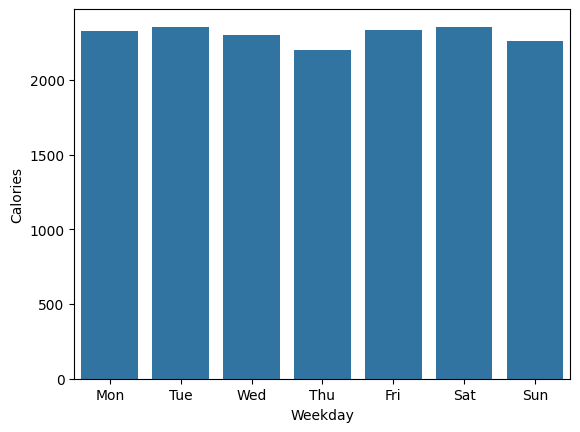

In [10]:
avg_cal = data1.groupby('Weekday')['Calories'].mean().reset_index()

# Reorder weekdays
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_cal['Weekday'] = pd.Categorical(avg_cal['Weekday'], categories=weekday_order, ordered=True)
avg_cal = avg_cal.sort_values('Weekday')

sns.barplot(x = "Weekday", y= "Calories", data=avg_cal)

##### __Insight__: On average, the users burn around 2300 calories each day, with relatively minor differences between each day of the week, inferring a trend of consistent activity behavior throughout the week

#### Distribution of Active Minutes

In [11]:
active_min_avg = data1[["VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes", "SedentaryMinutes"]].mean()
active_min_avg_df = pd.DataFrame({'active_min_avg': active_min_avg})
sum_active_min_avg = active_min_avg.sum()
active_min_avg_df['Percentage'] = (active_min_avg_df['active_min_avg'] / sum_active_min_avg) * 100
active_min_avg_df.head()

,active_min_avg,Percentage
VeryActiveMinutes,21.164894,1.736602
FairlyActiveMinutes,13.564894,1.113014
LightlyActiveMinutes,192.812766,15.820493
SedentaryMinutes,991.210638,81.329891


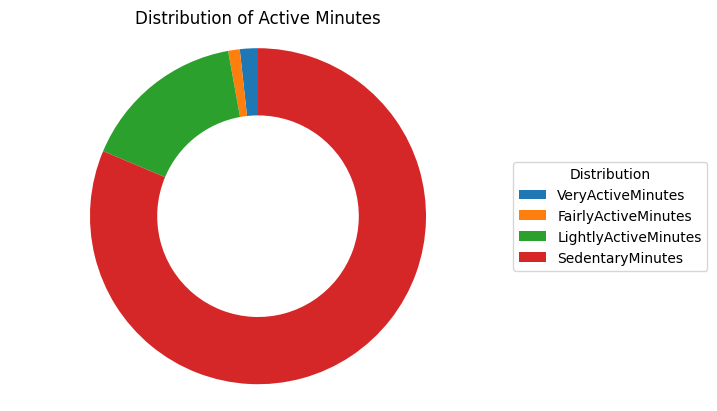

In [12]:
fig, ax = plt.subplots()
wedges, _, legend = ax.pie(active_min_avg_df['Percentage'], labels=['']*len(active_min_avg_df), autopct='', startangle=90, wedgeprops=dict(width=0.4))
ax.axis('equal')
ax.legend(wedges, active_min_avg_df.index, title='Distribution', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Active Minutes')
plt.show()

##### __Insight__: On average, 80% of the users' reported time are inactive (sedentary) and a significant portion is spent on light activities

#### Distribution of Active Distance

In [13]:
active_dis_avg = data1[["VeryActiveDistance","ModeratelyActiveDistance","LightActiveDistance", "SedentaryActiveDistance"]].mean()
active_dis_avg_df = pd.DataFrame({'active_dis_avg': active_dis_avg})
sum_active_dis_avg = active_dis_avg.sum()
active_dis_avg_df['Percentage'] = (active_dis_avg_df['active_dis_avg'] / sum_active_dis_avg) * 100
active_dis_avg_df['Percentage']

VeryActiveDistance          27.762393
ModeratelyActiveDistance    10.485486
LightActiveDistance         61.722443
SedentaryActiveDistance      0.029678
Name: Percentage, dtype: float64

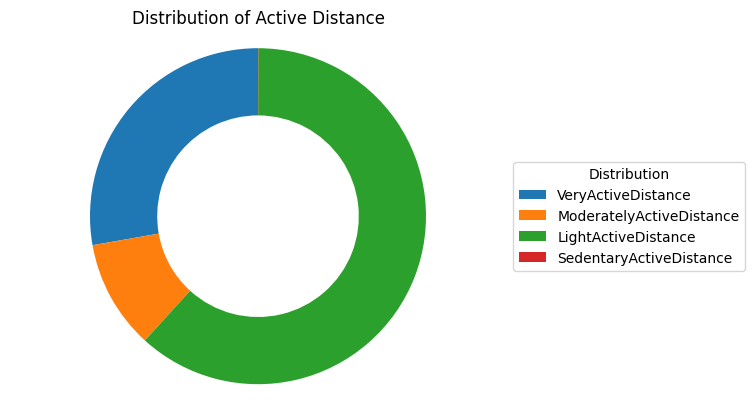

In [14]:
fig, ax = plt.subplots()
wedges, _, legend = ax.pie(active_dis_avg_df['Percentage'], labels=['']*len(active_dis_avg_df), autopct='', startangle=90, wedgeprops=dict(width=0.4))
ax.axis('equal')
ax.legend(wedges, active_dis_avg_df.index, title='Distribution', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Active Distance')
plt.show()

##### __Insight__: On average, 62% of the distance traveled by users are considered light activities and "very active" activities make up almost one third of the distance traveled 

#### Correlation between the different types of active minutes and steps taken 

In [15]:
steps_df = data1[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", "TotalSteps"]]
corr_steps = steps_df.corr()
corr_steps

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSteps
VeryActiveMinutes,1.000000,0.312420,0.051926,-0.164671,0.667079
FairlyActiveMinutes,0.312420,1.000000,0.148820,-0.237446,0.498693
LightlyActiveMinutes,0.051926,0.148820,1.000000,-0.437104,0.569600
SedentaryMinutes,-0.164671,-0.237446,-0.437104,1.000000,-0.327484
TotalSteps,0.667079,0.498693,0.569600,-0.327484,1.000000


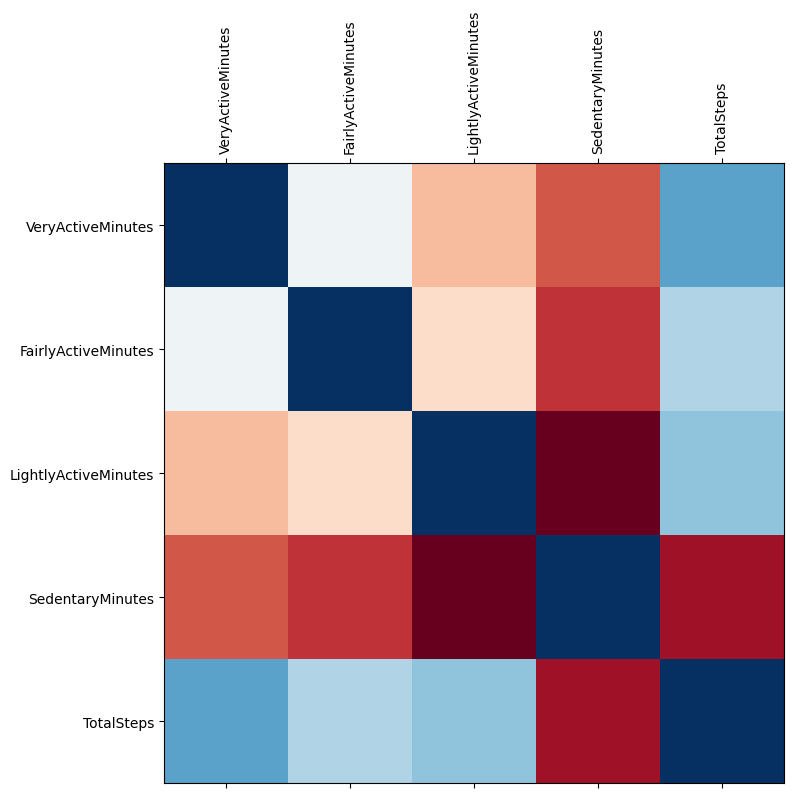

In [16]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr_steps, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_steps.columns)), corr_steps.columns, rotation='vertical');
plt.yticks(range(len(corr_steps.columns)), corr_steps.columns);

##### __Insight__: Although all types of active minutes (non-SedentaryMinutes) positively correlate with the number of total steps taken during the day, the time spent on active activities has the strongest relationship. In other words, the more time a person dedicate to "very active" activity, the higher the number of total steps taken during the day.

#### Correlation between the different types of active minutes and calories burnt

In [17]:
cal_df = data1[["VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", "Calories"]]
corr_cal = cal_df.corr()
corr_cal

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
VeryActiveMinutes,1.000000,0.312420,0.051926,-0.164671,0.615838
FairlyActiveMinutes,0.312420,1.000000,0.148820,-0.237446,0.297623
LightlyActiveMinutes,0.051926,0.148820,1.000000,-0.437104,0.286718
SedentaryMinutes,-0.164671,-0.237446,-0.437104,1.000000,-0.106973
Calories,0.615838,0.297623,0.286718,-0.106973,1.000000


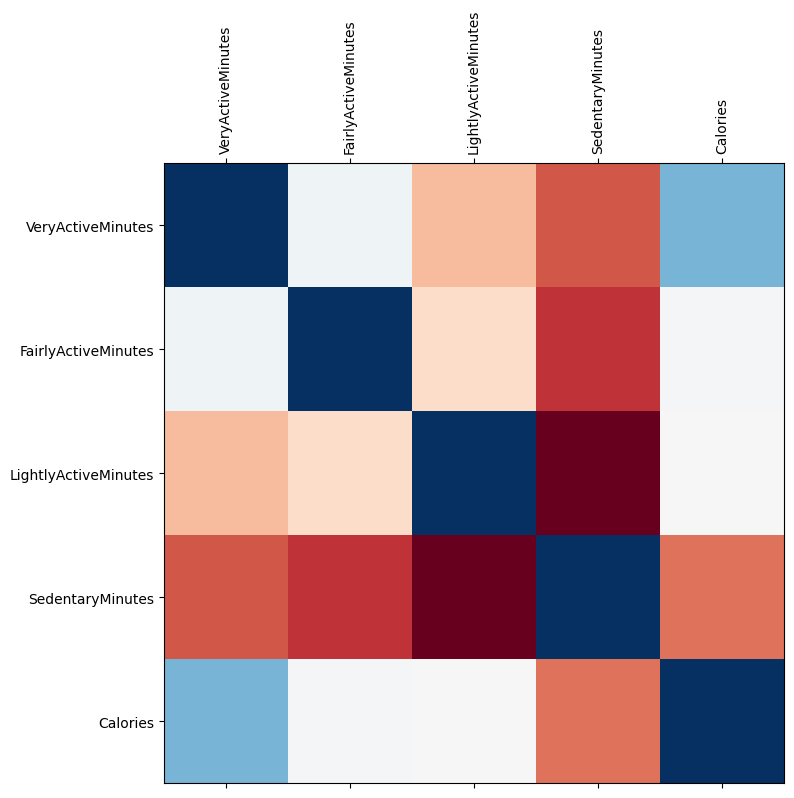

In [18]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr_cal, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_cal.columns)), corr_cal.columns, rotation='vertical');
plt.yticks(range(len(corr_cal.columns)), corr_cal.columns);

##### __Insight__: Only the time spent on "very active" activities share a noticeable correlation with the Calories burnt, inferring that only "very active" activities are significantly effective to burn calories. In addition, the more sedentary time a user has, the less calories are burnt.

##### Setting benchmark based on the average active minutes (non-SedentaryMinutes)

In [20]:
active_min_avg_df.head()

,active_min_avg,Percentage
VeryActiveMinutes,21.164894,1.736602
FairlyActiveMinutes,13.564894,1.113014
LightlyActiveMinutes,192.812766,15.820493
SedentaryMinutes,991.210638,81.329891


In [21]:
benchmark = (1.736602 + 1.113014 + 15.820493)/81.329891*100
benchmark

22.956023634656045

##### Categorizing users based on active minutes

In [22]:
user_data = data1.groupby('Id', as_index=False)[["ActiveMinutes", "TotalMinutes"]].mean()
user_data["ActivePercentage"] = user_data["ActiveMinutes"] / user_data["TotalMinutes"]*100
user_data["ActiveType"] = ["HighlyActiveUser" if x >= benchmark else "LessActiveUser" for x in user_data["ActivePercentage"]]
user_data_dis = user_data["ActiveType"].value_counts(normalize=True)*100
user_data_dis_df = pd.DataFrame({'ActiveType': user_data_dis.index, 'Percentage': user_data_dis.values})
user_data_dis_df

,ActiveType,Percentage
0,LessActiveUser,54.545455
1,HighlyActiveUser,45.454545


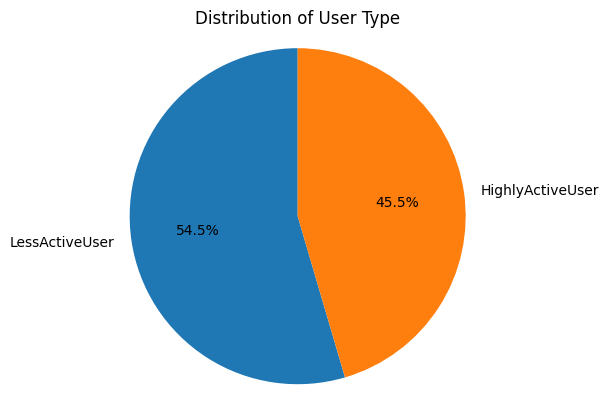

In [23]:
plt.pie(user_data_dis_df["Percentage"], labels=user_data_dis_df["ActiveType"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of User Type')
plt.show()

# Recommendations for Bellabeat App

### 1) Gamify "very active" minutes
##### Since time spent doing "very active" activities are essential to calories loss, Bellabeat can consider setting daily goals of "very active" minutes for users on the app and personalize according to user's data. 
##### To inventivize "very active" activities, the app can provide rewards such as discounts on products for achieving daily goals milestones. The app should also reward users who fall into the HighlyActiveUser category to encourage sustaining high levels of activity
##### This helps users engage with the app more and encourages users to exercise, demonstrating the app's effectiveness and attracting new users.

### 2) Creating reminders to reduce Sedentary Minutes
##### Currently reported Sedentary Minutes among users are relatively high. Bellabeat can consider creating reminders to exercise through their app once a certain threshold of Sedentary Minutes has been reached by the user. 
##### In addition, the current data shows that the calories burnt in the weekends is the same as the weekdays, indicating that the activity level for consumers is consistent throughout the week. Since people are likely to have more free time during the weekends, the reminders can also encourage extra activity on Saturdays and Sundays. The company can market this as one of their new features

### 3) Target Highly Active User to promote products
##### It can be inferred that users who have demostrated consistently high level of activity are more health-aware and more likely to be converted into consumers of Bellabeat's other lines of products such as Leaf, Time, Spring and Membership.
##### Bellabeat should actively target these users to promote their products and notify them of exclusive deals in order to capitalized on their users' commitment to improving their well-being. This is a good target audience that Bellabeat can provide extra value to with their products.